In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialiseWorld(size=[10,10],num_of_val=3):
    world = np.random.randint(num_of_val,size = size)
    area = size[0]*size[1]
    initialProbability = np.full(np.shape(world),1/area)
    return world, initialProbability
    

In [3]:
def moveRobot(location, world, moveProb = 0.9):
    direction = random.randint(0,3)
    worldSize = np.shape(world)
    #0 is up, 1 is right, 2 is down, 3 is left
    #returns the original location if impossible to move
    if random.random() > moveProb:
        location = location   
        #print('failed to move')
        
    elif direction == 0:
        location[0] -= 1
        if location[0] == -1:
            location[0] = worldSize[0]-1
            
    elif direction == 1:
        location[1] += 1
        if location[1] == worldSize[1]:
            location[1] = 0
            
    elif direction == 2:
        location[0] += 1
        if location[0] == worldSize[0]:
            location[0] = 0
            
    elif direction == 3:
        location[1] -= 1
        if location[1] == -1:
            location[1] = worldSize[1]-1
    
    
    
    
    if direction == 0:
        #print('up') 
        direction = [-1,0]
    elif direction == 1:
        #print('right')  
        direction = [1,1]
    elif direction == 2:
        #print('down')
        direction = [1,0]
    elif direction == 3:
        #print('left')  
        direction = [-1,1]
    
    return location, direction
        
        
    
    

In [4]:
def estimateAfterMotion(worldProb, direction, moveProb = 0.9):
    
    failed_move_estimate = np.multiply(worldProb, 1-moveProb)
    
    worldProb = np.roll(worldProb,direction[0],direction[1])
    
    move_estimate = np.multiply(worldProb,moveProb)
    
    return np.add(move_estimate,failed_move_estimate)


In [12]:
def estimateAfterMeasurement(world,worldProb,location,sensorProb = 0.9):
    n_rows, n_cols = np.shape(world)
    estimate = worldProb
    measurement = world[location[0]][location[1]]
    for i_row in range(n_rows):
        for i_col in range(n_cols):
            sameMeasurement = (world[i_row][i_col] == measurement)
            
            estimate[i_row][i_col] = estimate[i_row][i_col]*(sensorProb*sameMeasurement + (1-sensorProb)*(1-sameMeasurement))
            
    return np.divide(estimate, np.sum(estimate))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


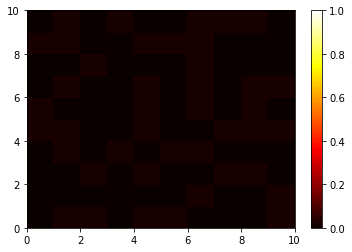

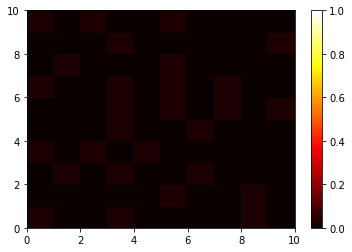

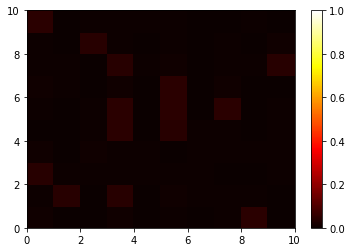

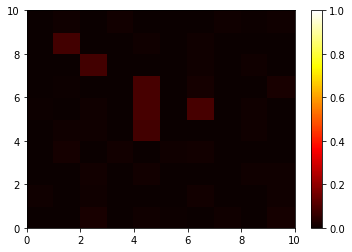

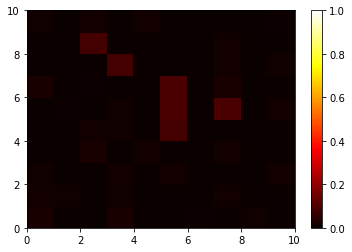

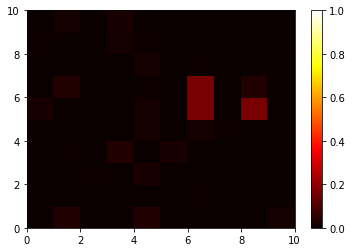

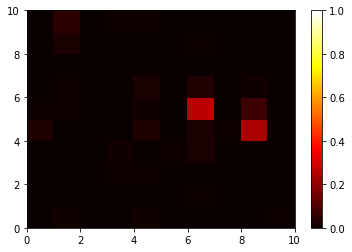

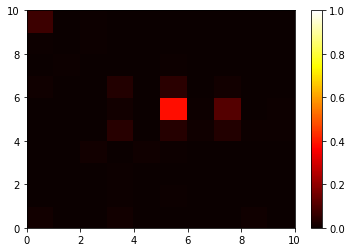

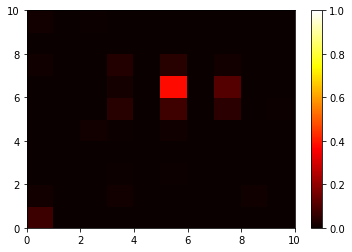

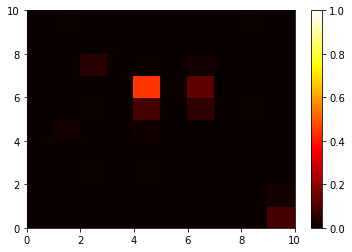

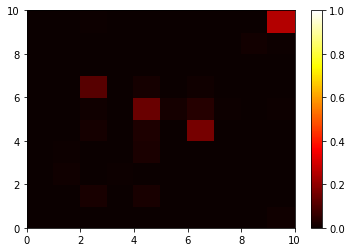

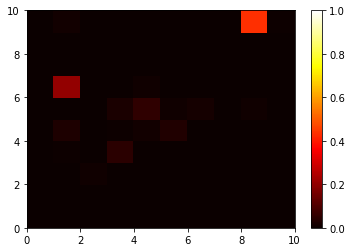

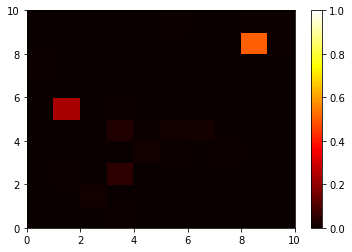

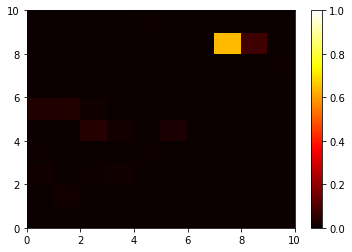

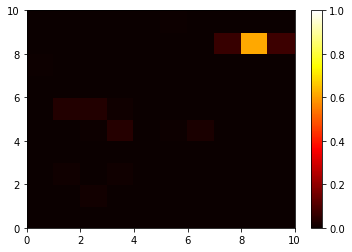

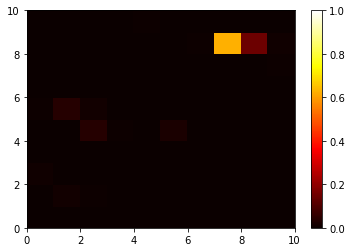

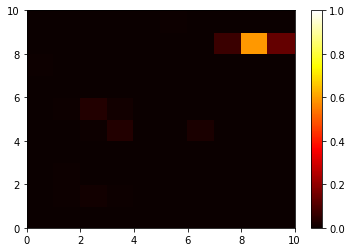

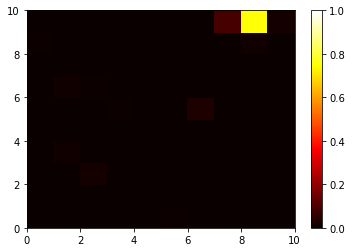

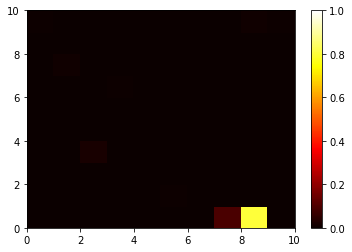

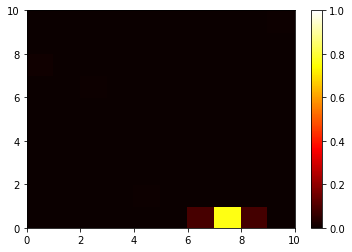

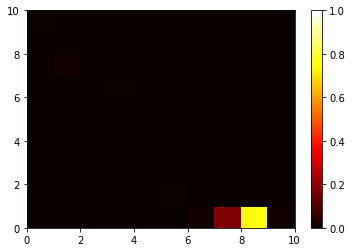

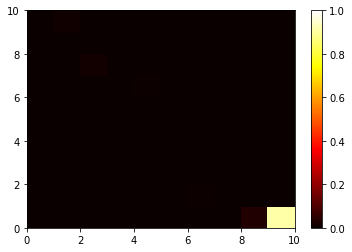

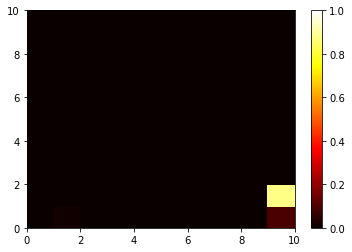

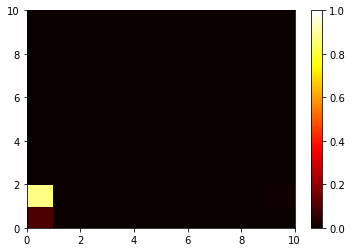

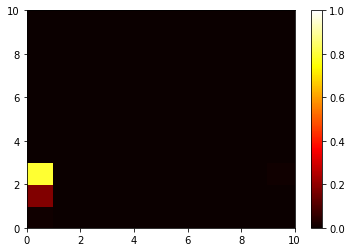

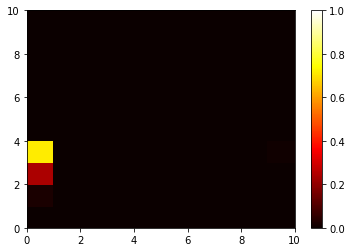

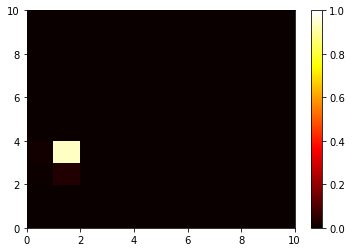

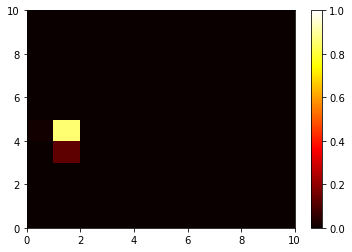

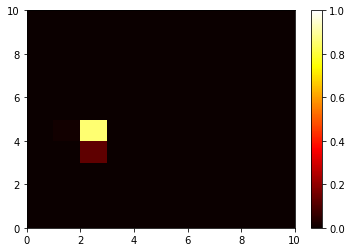

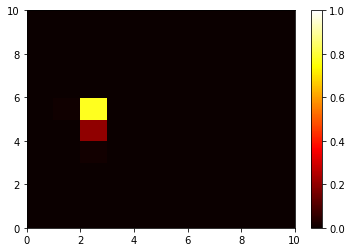

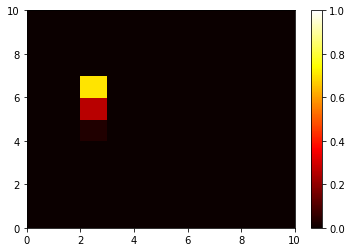

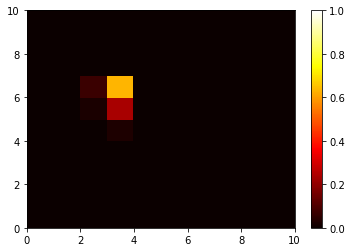

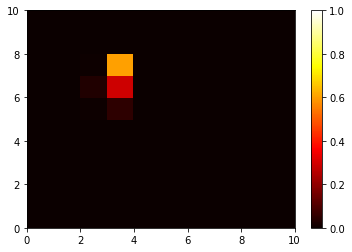

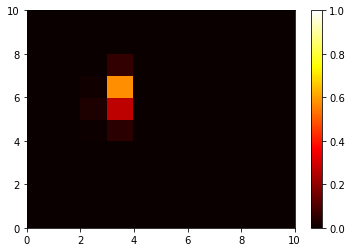

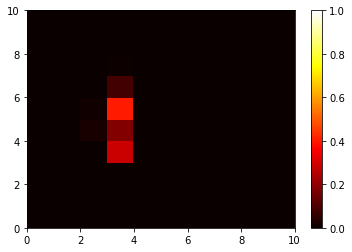

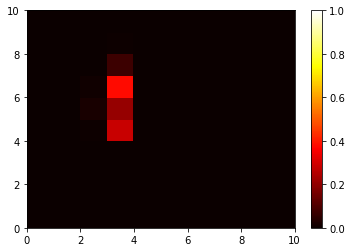

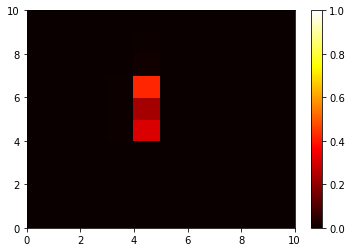

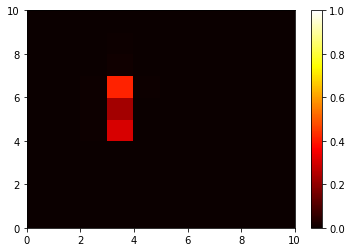

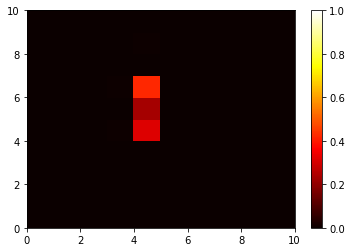

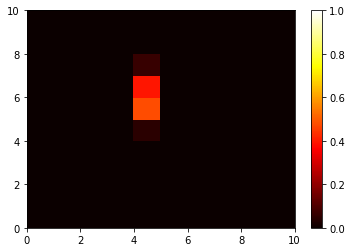

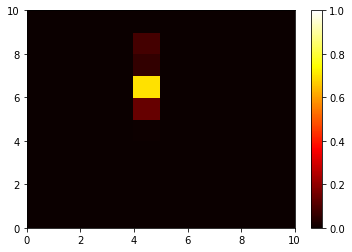

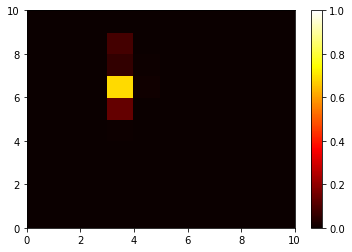

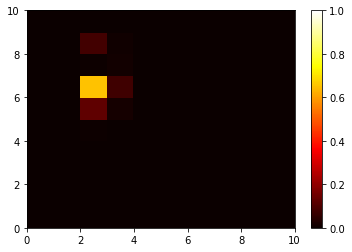

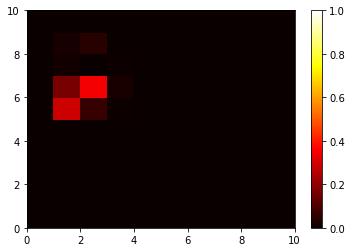

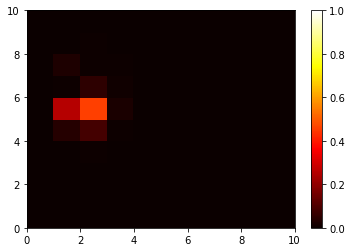

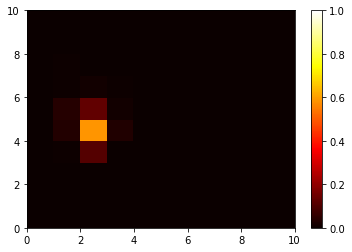

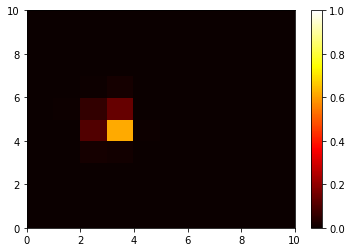

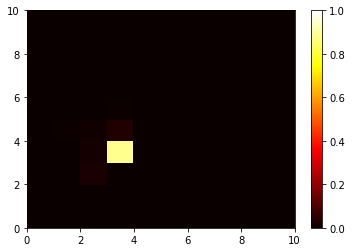

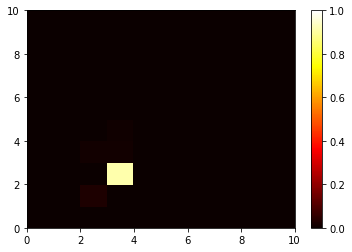

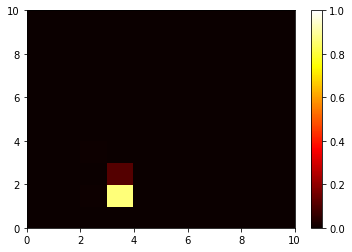

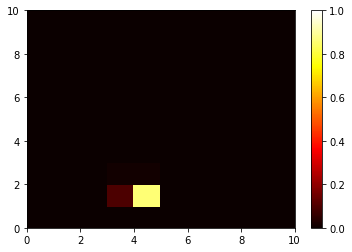

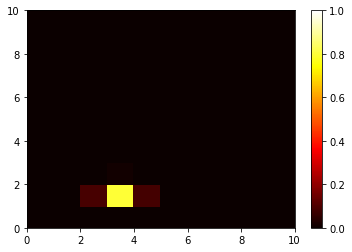

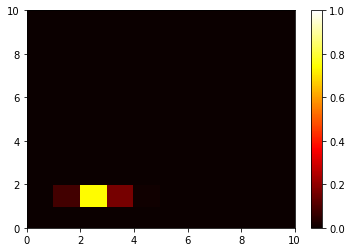

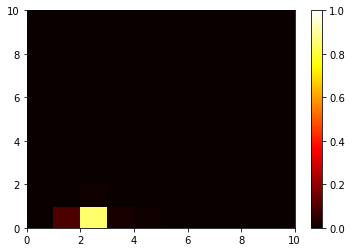

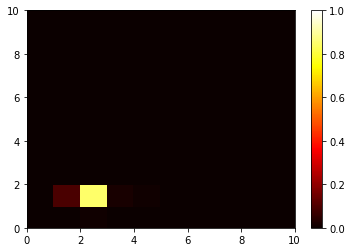

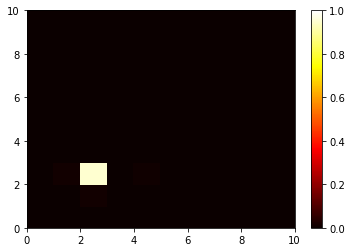

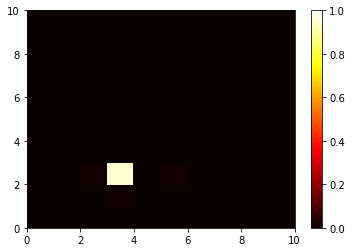

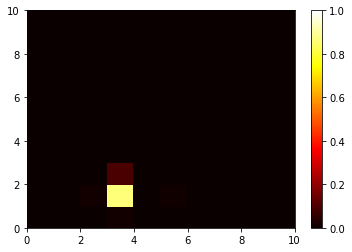

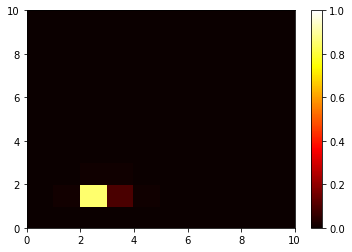

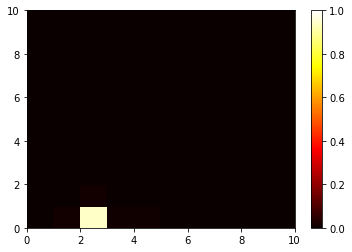

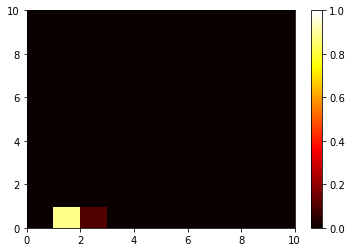

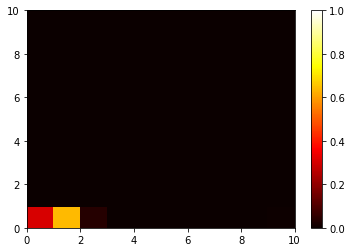

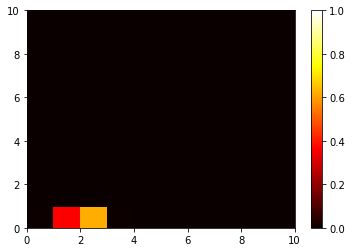

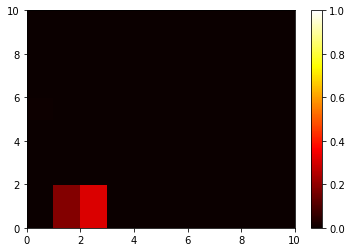

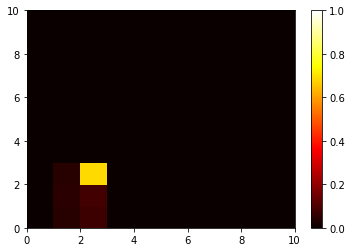

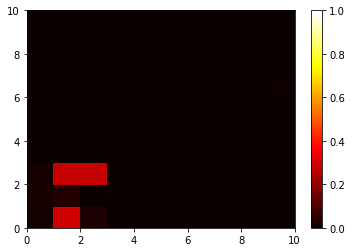

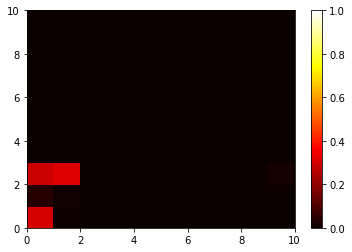

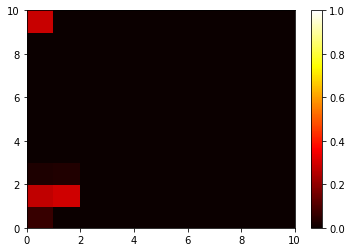

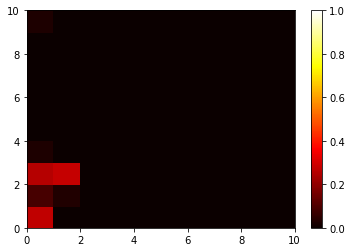

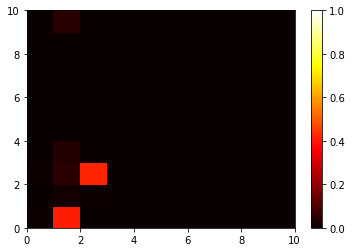

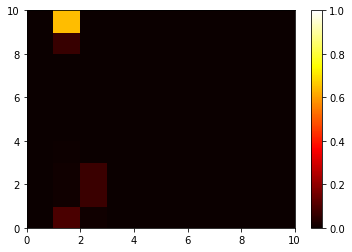

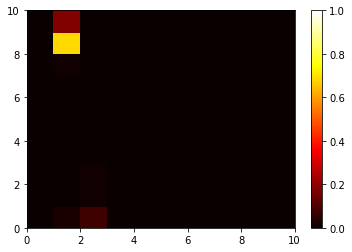

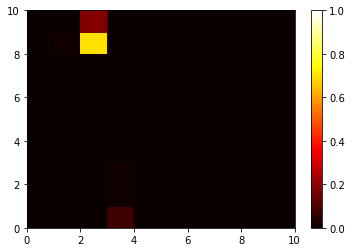

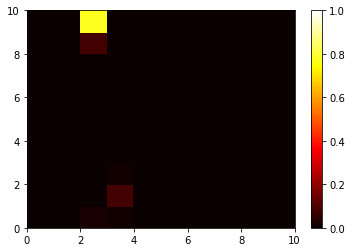

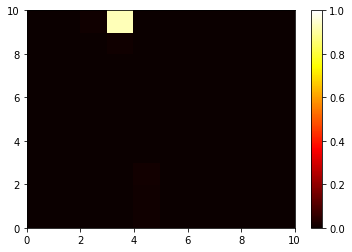

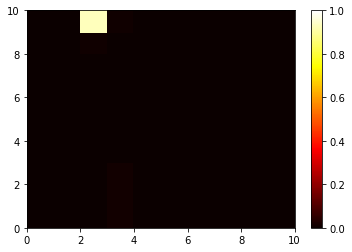

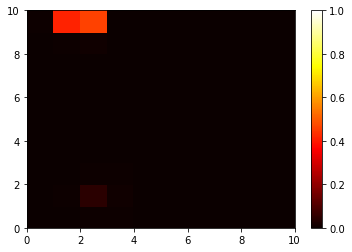

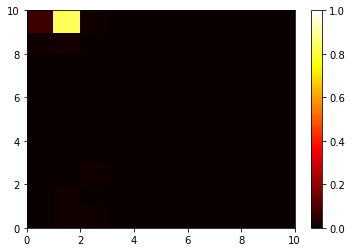

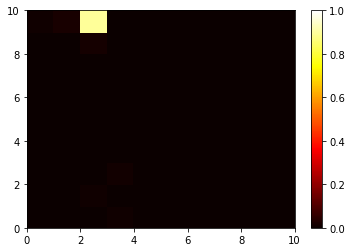

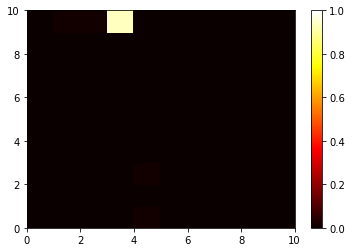

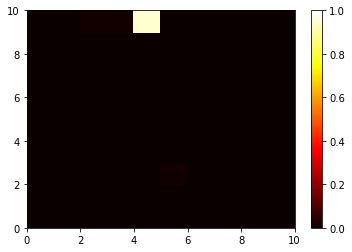

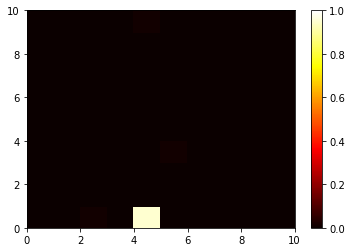

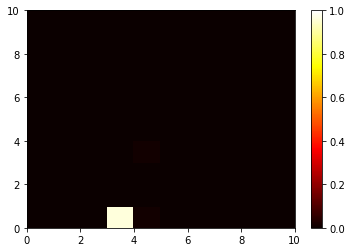

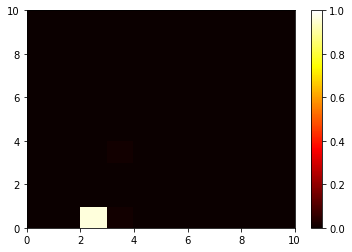

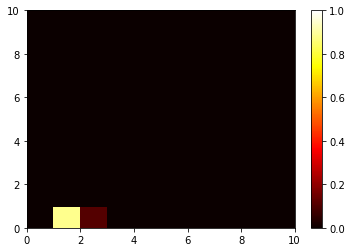

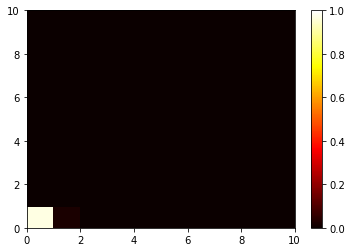

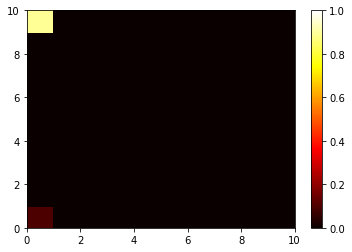

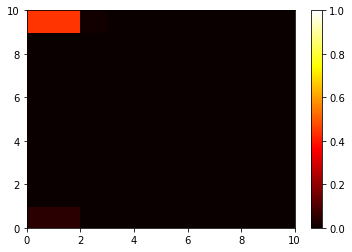

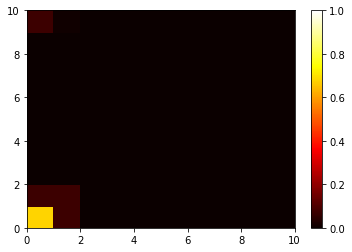

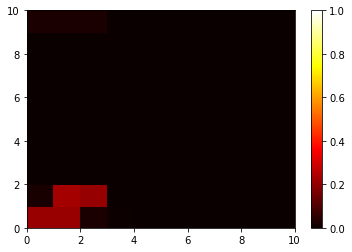

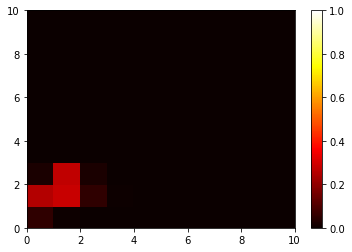

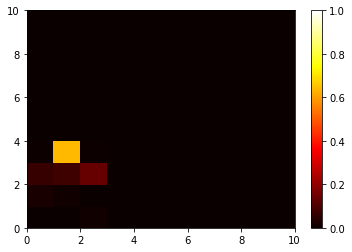

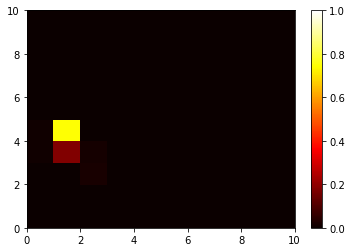

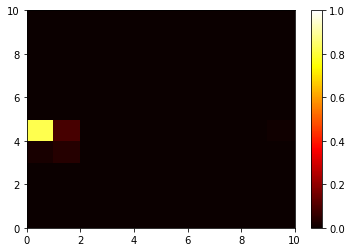

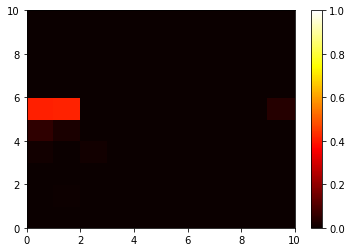

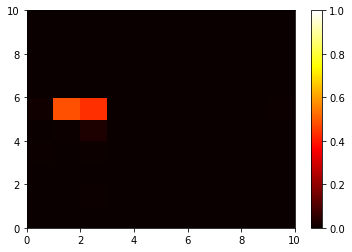

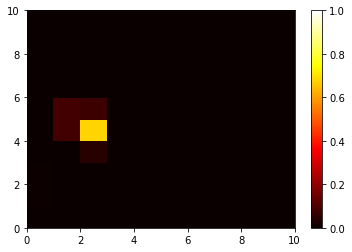

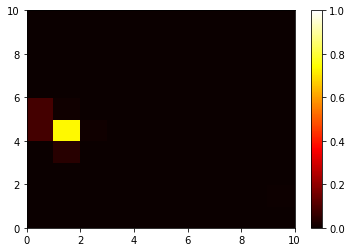

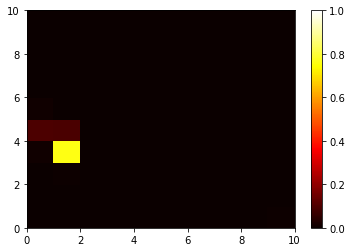

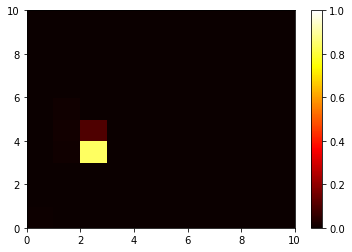

In [26]:
i = 0
world, worldProb = initialiseWorld([10,10],2)
location = [1,1]
while i < 100:
    i+=1
    location, direction = moveRobot(location, world, 0.9)
    #print(location)
    worldProb = estimateAfterMotion(worldProb, direction, 0.9)
    worldProb = estimateAfterMeasurement(world, worldProb, location, 0.9)
    if True:#i % 100 == 0:
        plt.figure(i)
        plt.pcolormesh(worldProb, cmap = 'hot', vmin = 0, vmax = 1)
        plt.colorbar()
        savelocation = f'Images\image{i}'
        plt.savefig(savelocation)

In [ ]:
worldProb